### Camera Calibration

1. I started by extracting the chess-board corners using the CV2 function:
cv2.findChessboardCorners, which takes as input a grayscale image. 

2. A sample image was used to draw the chessboardcorners.

3. I make two arrays to hold the Object points (3D points) and the corresponding Image points (2D points)

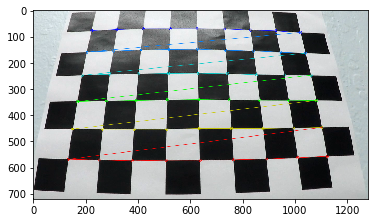

4. The object points are created as per the requirements of the user. It is done using the meshgrid function that creates a grid of points given the number of rows and columns of the inner points on the borad. 

5. The corresponding image points are extracted from the image using the findchessboardcorners function in CV2. 

6. Now that we have the image points and the object points, we use this to calibrate the camera using cv2.calibrateCamera. 

7. This gives us the Camera matrix, distortion coefficieents, rotation and translation vectors. 

8. Using this we undistort a sample image using the cv2.undistort function:

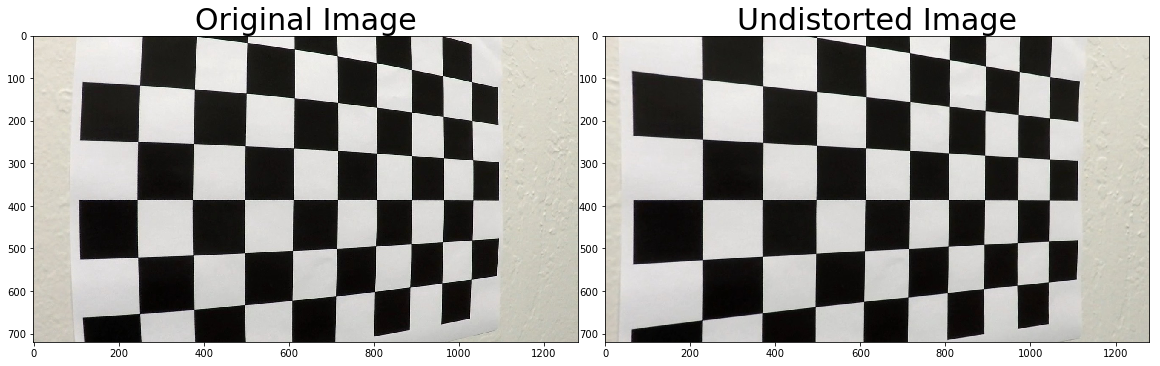

#### Applying the undistort function to a sample road image:

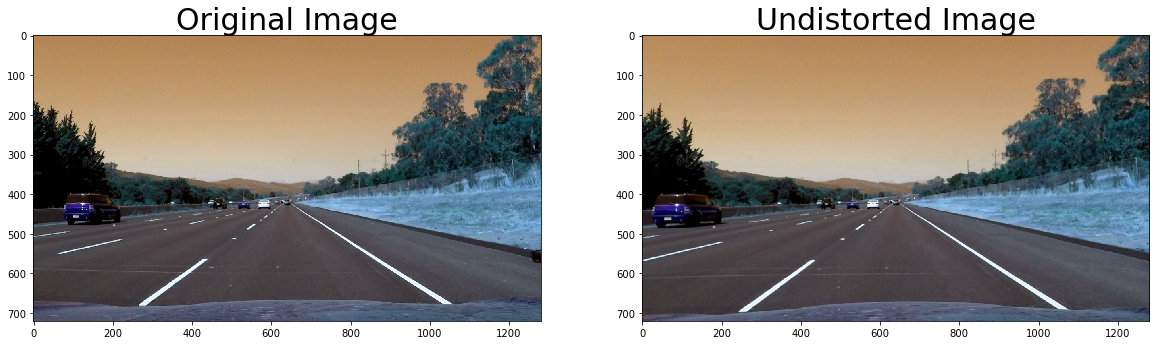

### Perspective Transform of the image: 

A function was made to perform the perspective transform of an image. Foe this, we need the destination and the source points of the sort of transform we want to perform. 

Given the source points of the road lanes in terms of a trapezoid, we transform it to a rectangular image. In the process, we compute the transform matrix and the inverse matrix that would allow us to transform from the perspective zoom to the original frame as shown in an example here: 

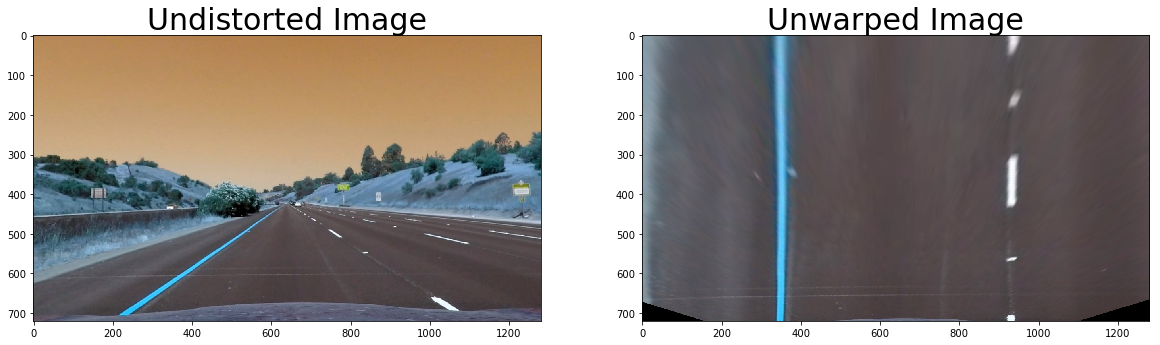

### Pipeline: Color thresholds and color spaces

The following CV tehniques were attempted to extract the lane lines: 

1. Sobel X and Y
2. Sobel Magnitude
3. Sobel Direction 

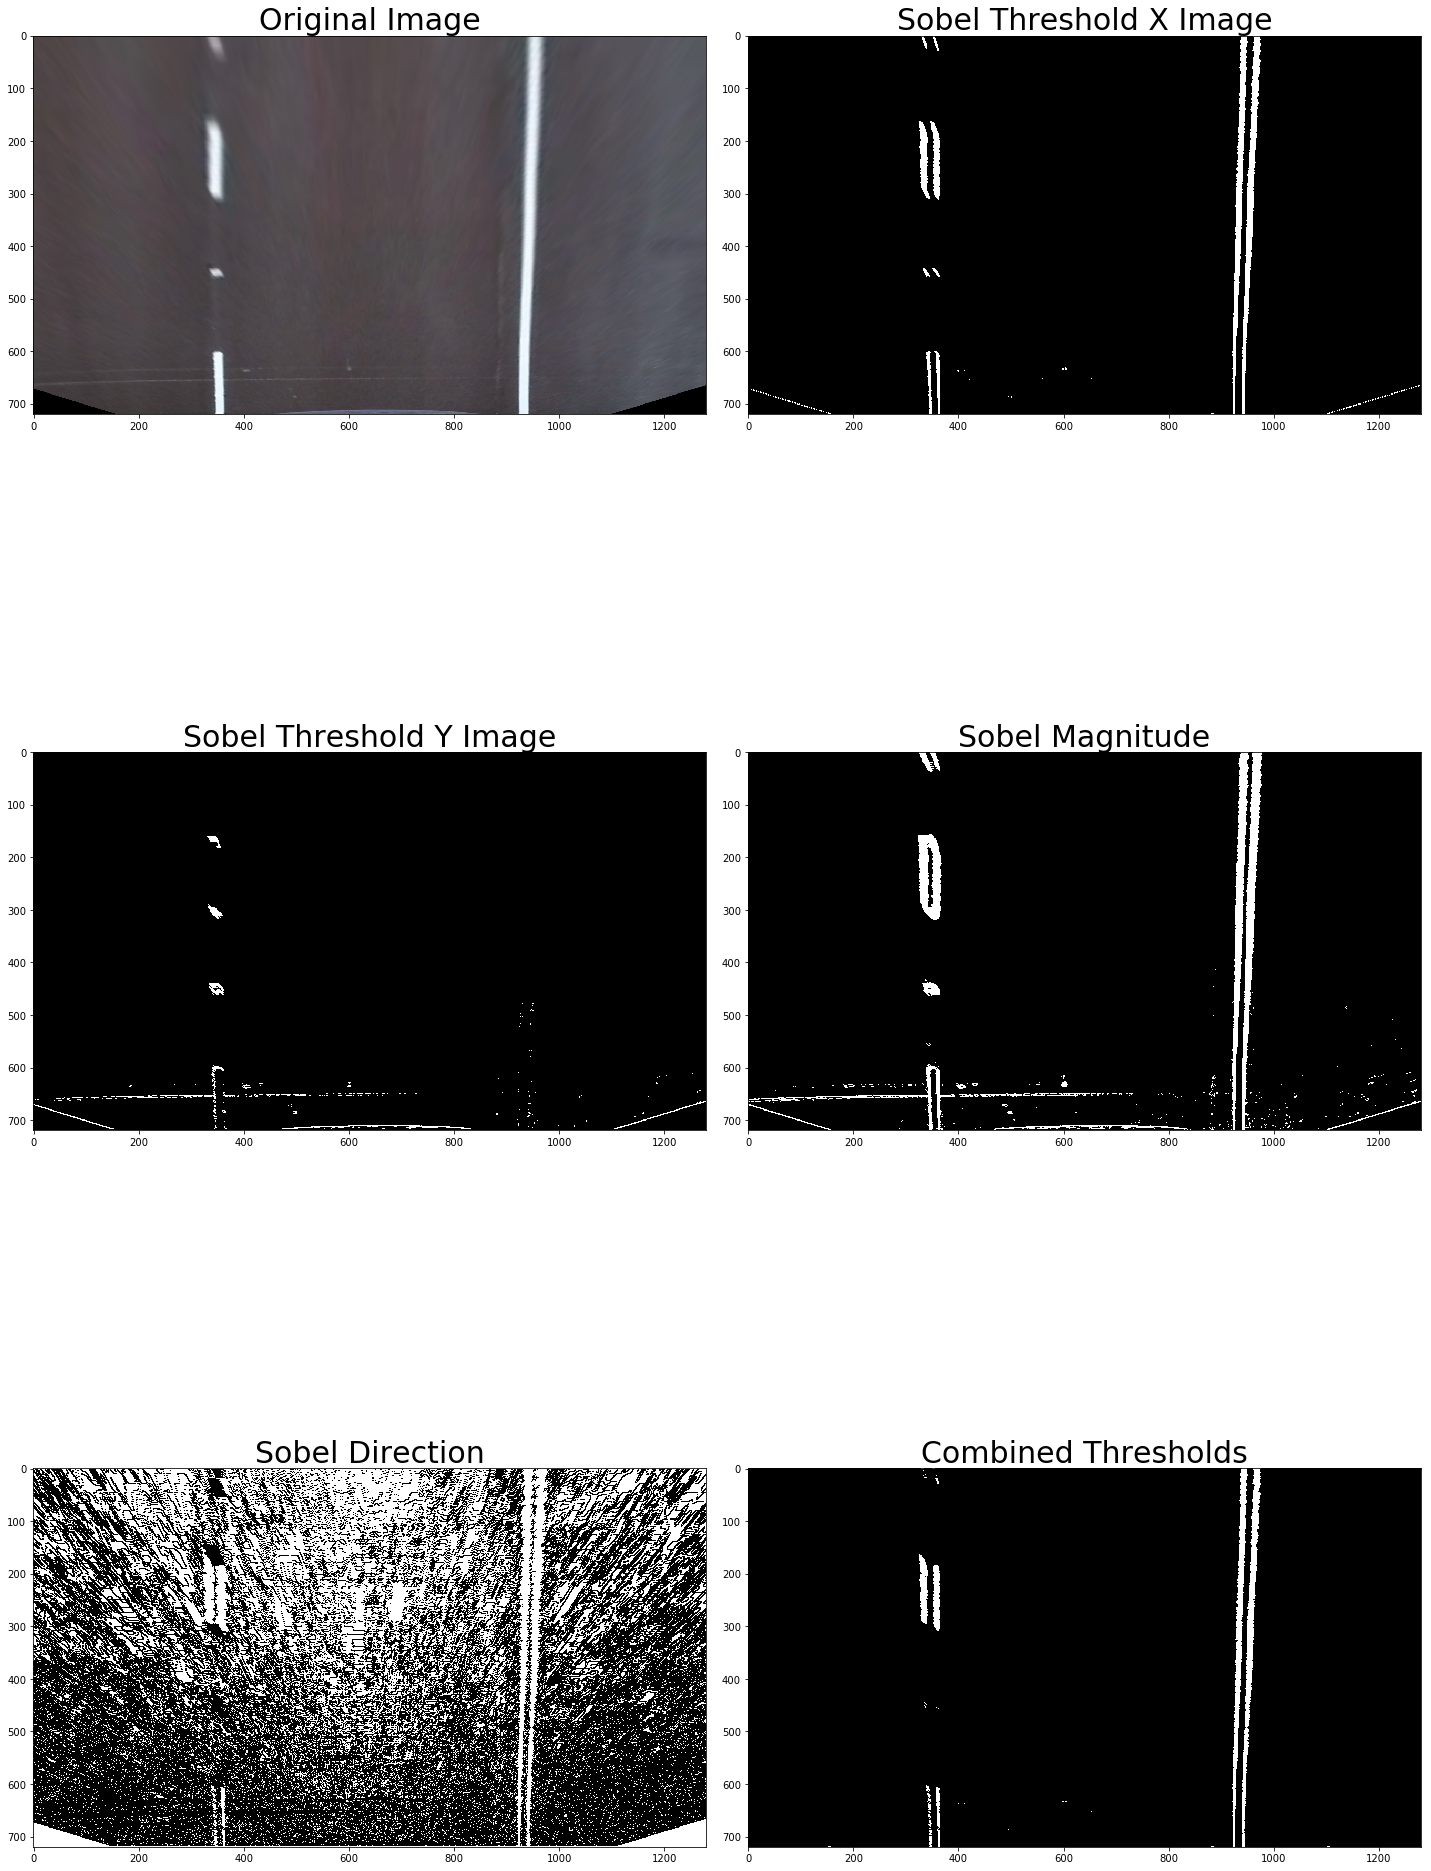

Color Spaces extracted and Pipeline created:

1. In HLS color space, the yellow and white lanes were extracted using a different low and high threshold. This was overlaid over a image array having 3 layers and combined with the original image using bitwise addition of pixels: 

2. This is perspective transformed and the output is as follows: 

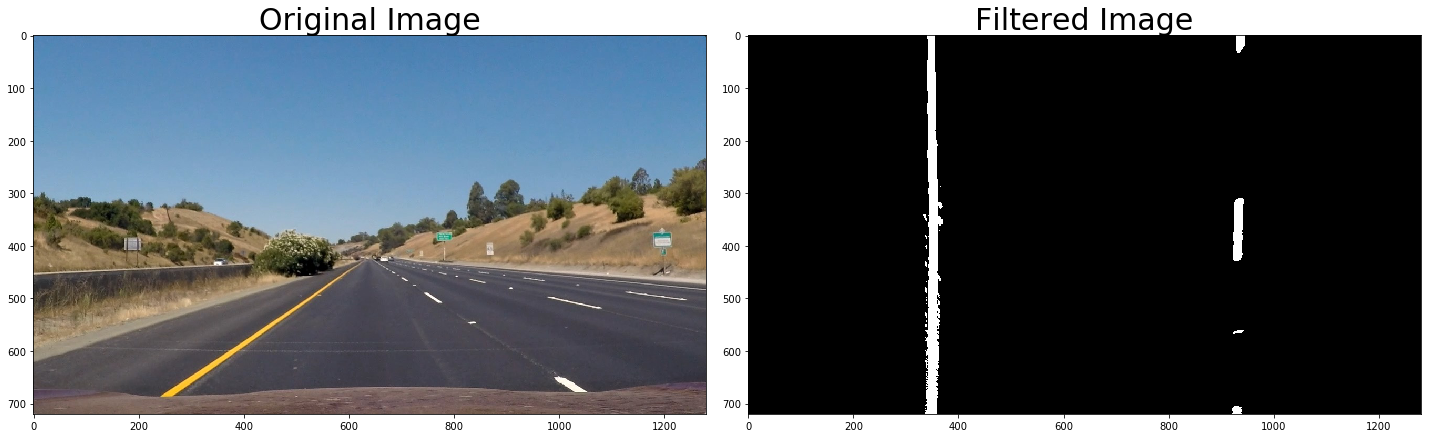

The Pipeline is then run on the test images. 

### Sliding_Window Search

Once the Pipeline performs well on the test images, we extract the lane pixels to fit a model. 

This model fitting is done by using the Sliding window search discussed by Udacity. This fitting is appropriate only if used for the first few frames to ensure lane detection. 

The output of the sliding search for a sample image is as follows: 
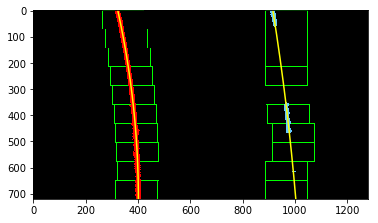

#### Using the previous fit to search in the same region

Once the model is fit to the lane pixels, we search aroud it to find the model in the subsequent frames.

The np.polyfit function is used to fit the lane pixels using any nth order polynomial. 

The previous fit polynomial is used as the basis and a margin is used to search around it given a threshold of search region. 

The following is an example of searching around the fit polynomial:

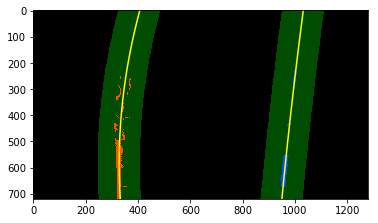

### Highlighting the Lane

I defined a function that was able to fit the left and the right polynomials over the original image by using the inverse matrix. 

The following is an example of the same: 
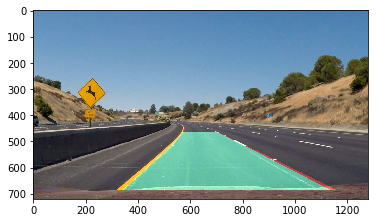

### Writing the Text information on the frame

I defined a function to write data on the frame. This included the lane curvature and the deviation from the center of the lane. This was adopted from the course content: 

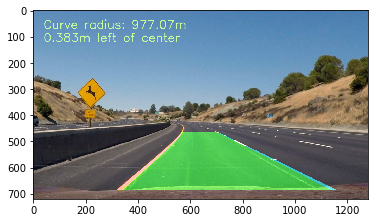

### Implement pipeline on Video file

I felt this was the most challenging part of the project. It required us to thread together the images from a video so that it could give us the required output.

I took two approaches for the same: 

#### 1. Read the video one frame at a time: 

I tried taking the conventional approach of reading the video file using cv2.VideoCapture and then defining the lane extraction pipeline while processing every single frame individually. 

This process was slow and inefficient, so I tried implementing the Python Class approach suggested in the course. 

#### 2. Python Class:

I implemented the pyhton class shown in the course. This allowed me to track and retain the information between frames efficiently. 

This proved to be challenging as it was not easy to comprehend the structure of implementing a Python Class as I am a beginner in programming. 

I looked around some codes in GitHub to understand how to efficiently implement Class to a string of images. 

The Class Line() also contains a function called the add_fit() which was used to check whether a fit was found in the current frame. This also checks if the current fit is feasible given its deviation from the best_fit (based on last 5 frames) 

### Process Image:

Finally, once I had created the Class Line(), I wrote a function to Process the image and run the sliding window or the polynomial fit from previous frames. Also, the left and right fit were evaluated to see if their intercepts made sense. Else, the two fit lines were set to None. 

I am currently working on applying certain filtering methods and foolproof techniques to smoothen the detection and improve the lane detection. 

Right now I am facing issues in completing the challenge video. 

### The Output Project video link is as follows: 

https://github.com/AkshaySDesai/Udacity_Advanced_Lane_Detection_Project4